In [1]:
import numpy as np

In [5]:
idx_inputs = np.load(open('./train_inputs.npy', 'rb'))
idx_outputs = np.load(open('./train_outputs.npy', 'rb'))
idx_targets = np.load(open('./train_targets.npy', 'rb'))
type(idx_inputs), type(idx_outputs), type(idx_targets)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [6]:
idx_inputs[3:5]

array([[ 20,  30, 107,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 93,   7,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [7]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 68.6 MB/s 
     |████████████████████████████████| 86 kB 4.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [8]:
import preprocess as pp

In [10]:
prepro_configs = pp.json.load(open('./data_configs.json', 'r'))
type(prepro_configs)

dict

In [13]:
prepro_configs.keys()

dict_keys(['char2idx', 'idx2char', 'vocab_size', 'pad_symbol', 'std_symbol', 'end_symbol', 'unk_symbol'])

## Make model(모델 만들기)

In [14]:
import tensorflow as tf

## encode model

In [16]:
vocab_size = prepro_configs['vocab_size']
latent_dim = 60

In [17]:
encode_input = tf.keras.Input(shape=(None,))
encode_hidden = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=latent_dim)(encode_input)
encode_output, state_h, state_c = tf.keras.layers.LSTM(50, return_state=True)(encode_hidden)
encode_states = [state_h, state_c]

## decode model

In [18]:
decode_input = tf.keras.Input(shape=(None,))
decode_hidden = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=latent_dim)(decode_input)
decode_lstm, _, _ = tf.keras.layers.LSTM(50, return_state=True, return_sequences=True)(decode_hidden, initial_state=encode_states)
decode_output = tf.keras.layers.Dense(vocab_size, activation='softmax')(decode_lstm)

In [20]:
model = tf.keras.models.Model(inputs=[encode_input, decode_input], outputs=decode_output)

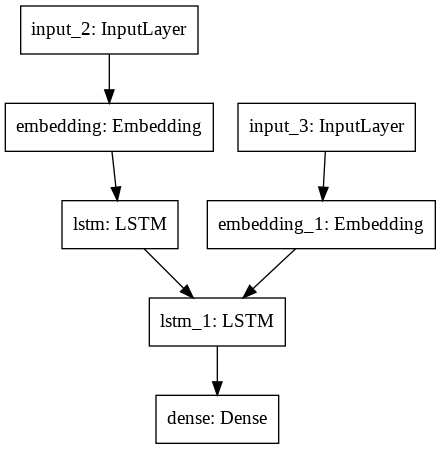

In [21]:
tf.keras.utils.plot_model(model)

In [22]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

## fit

In [24]:
model.fit(x=[idx_inputs, idx_outputs],y=idx_targets, batch_size=128, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 23ms/step - loss: 0.8762 - acc: 0.8180
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 0.8693 - acc: 0.8180
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 0.8634 - acc: 0.8180
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 0.8579 - acc: 0.8180
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 0.8521 - acc: 0.8180
Epoch 6/100
1/1 [==============================] - 0s 21ms/step - loss: 0.8458 - acc: 0.8180
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 0.8392 - acc: 0.8180
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 0.8326 - acc: 0.8180
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 0.8264 - acc: 0.8180
Epoch 10/100
1/1 [==============================] - 0s 28ms/step - loss: 0.8207 - acc: 0.8180
Epoch 11/100
1/1 [==============================] - 0s 25ms/step - lo

### 참고 : https://github.com/NLP-kr/tensorflow-ml-nlp-tf2/blob/master/6.CHATBOT/6.4.seq2seq.ipynb